In [8]:
import numpy as np

# for dataframes
import pandas as pd

# for easier visualization
import seaborn as sns

# for visualization and to display plots
from matplotlib import pyplot as plt

# import color maps
from matplotlib.colors import ListedColormap

from math import sqrt

# to split train and test set
from sklearn.model_selection import train_test_split

# to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import cross_val_score

# Machine Learning Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix,accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [1]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Zr5ullM7r4PasyjWm0NZ8_bXUxsaXCdLpoqct8h6gEkk',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'liverdiseasepredictiondeployment-donotdelete-pr-turailcijhew4g'
object_key = 'indian_liver_patient.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [2]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [3]:
df.shape

(583, 11)

In [4]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [5]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


Exploratory analysis

Filtering categorical data

In [6]:
df.dtypes[df.dtypes=='object']

Gender    object
dtype: object

Distribution of numerical features

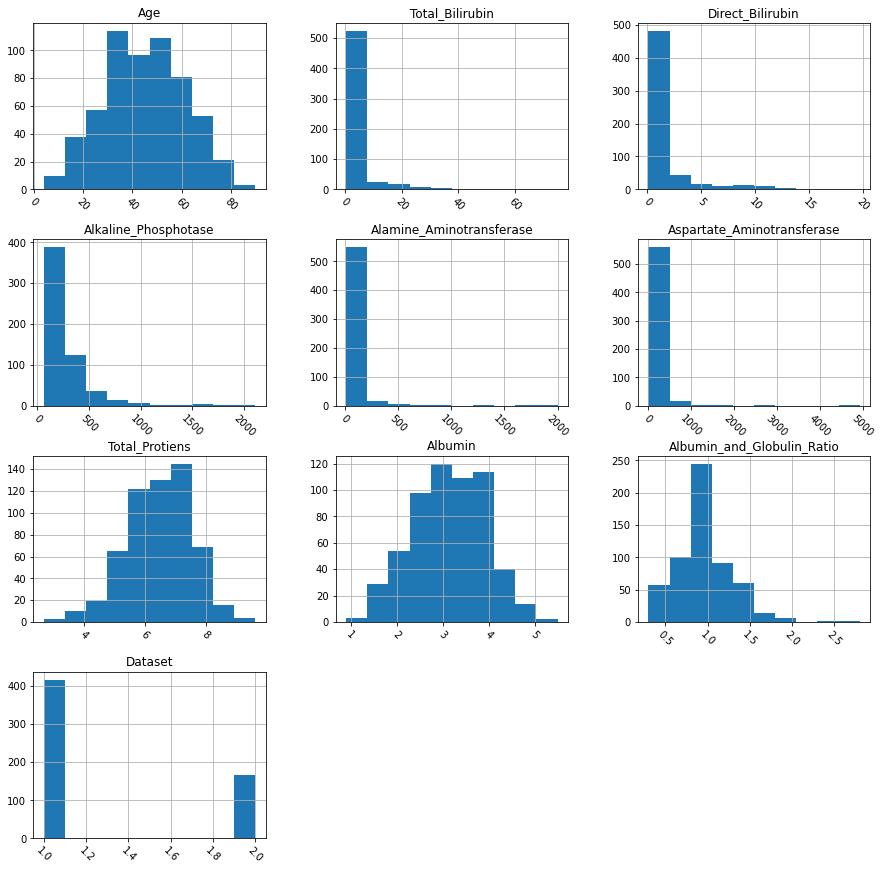

In [9]:
df.hist(figsize=(15,15), xrot=-45, bins=10)
plt.show()

In [10]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


Dataset i.e output value has '1' for liver disease and '2' for no liver disease so let's make it 0 for no disease to make it convenient

In [11]:
def partition(x):
    if x == 2:
        return 0
    return 1

df['Dataset'] = df['Dataset'].map(partition)

In [12]:
df.describe(include=['object'])

,Gender
count,583
unique,2
top,Male
freq,441


<AxesSubplot:xlabel='count', ylabel='Gender'>

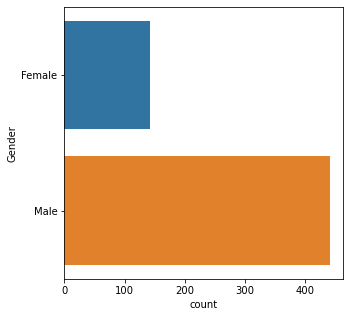

In [13]:
plt.figure(figsize=(5,5))
sns.countplot(y='Gender', data=df)

In [14]:
df[df['Gender'] == 'Male'][['Dataset', 'Gender']].head()

,Dataset,Gender
1,1,Male
2,1,Male
3,1,Male
4,1,Male
5,1,Male


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


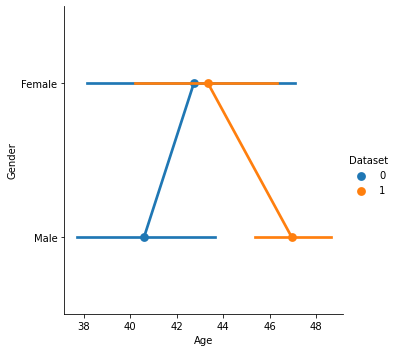

In [15]:
sns.factorplot (x="Age", y="Gender", hue="Dataset", data=df);

Number of patients that are male:  441
Number of patients that are female:  142


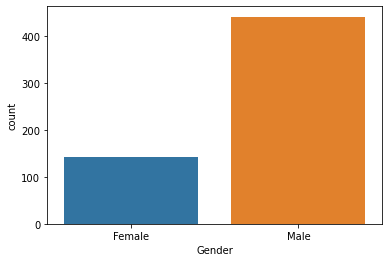

In [16]:
sns.countplot(data=df, x = 'Gender', label='Count')

M, F = df['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

Label Male as 0; Female as 1

In [17]:
def partition(x):
    if x =='Male':
        return 0
    return 1
df['Gender'] = df['Gender'].map(partition)

Scatter plot

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


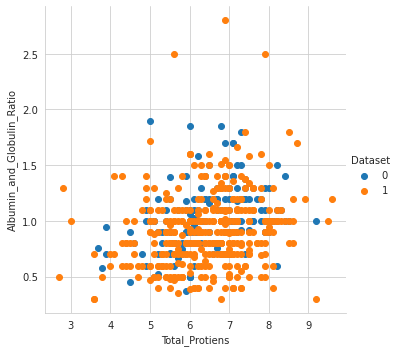

In [18]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(df, hue = 'Dataset', size = 5).map(plt.scatter, 'Total_Protiens', 'Albumin_and_Globulin_Ratio').add_legend()

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


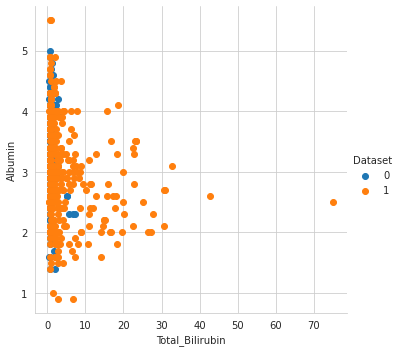

In [19]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(df, hue = 'Dataset', size = 5).map(plt.scatter, 'Total_Bilirubin', 'Albumin').add_legend()

In [20]:
df.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,-0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Gender,-0.056560,1.000000,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003424,-0.082416
Total_Bilirubin,0.011763,-0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_Bilirubin,0.007529,-0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,-0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,-0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Protiens,-0.187461,0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,0.003424,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131


<AxesSubplot:>

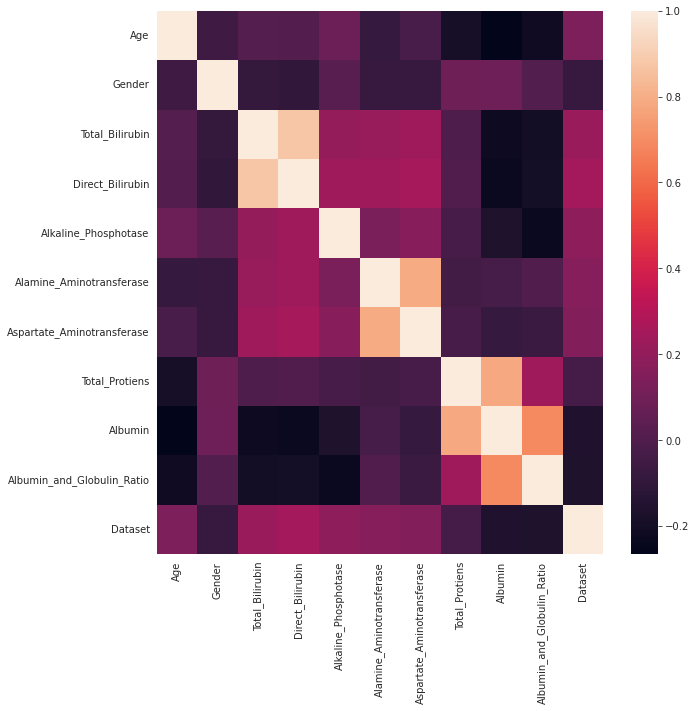

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

Data cleaning

In [22]:
df = df.drop_duplicates()
print( df.shape )

(570, 11)


There are 13 duplicates

Removing outliers

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Aspartate_Aminotransferase'>

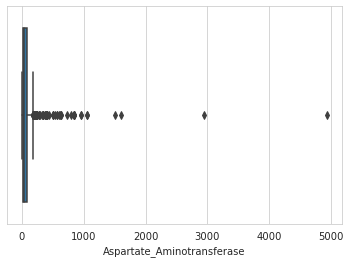

In [23]:
sns.boxplot(df.Aspartate_Aminotransferase)

In [24]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

135    4929
117    2946
118    1600
207    1500
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [25]:
df = df[df.Aspartate_Aminotransferase <=3000 ]
df.shape

(569, 11)

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Aspartate_Aminotransferase'>

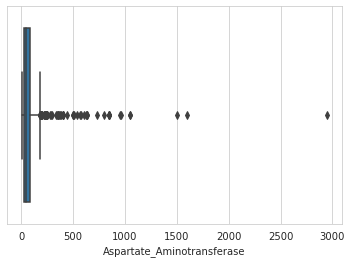

In [26]:
sns.boxplot(df.Aspartate_Aminotransferase)

In [27]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

117    2946
118    1600
207    1500
119    1050
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [28]:
df = df[df.Aspartate_Aminotransferase <=2500 ]
df.shape

(568, 11)

Dropping null values

In [29]:
df.isnull().values.any()

True

In [30]:
df=df.dropna(how='any')  

In [31]:
df.shape

(564, 11)

In [32]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


Data Modelling

In [33]:
y = df.Dataset
x = df.drop('Dataset', axis=1)

In [34]:
x

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...,...
578,60,0,0.5,0.1,500,20,34,5.9,1.6,0.37
579,40,0,0.6,0.1,98,35,31,6.0,3.2,1.10
580,52,0,0.8,0.2,245,48,49,6.4,3.2,1.00
581,31,0,1.3,0.5,184,29,32,6.8,3.4,1.00


In [35]:
y

0      1
1      1
2      1
3      1
4      1
      ..
578    0
579    1
580    1
581    1
582    0
Name: Dataset, Length: 564, dtype: int64

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                   )

In [37]:
x_train.value_counts()

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  Albumin  Albumin_and_Globulin_Ratio
4    0       0.8              0.2               460                   152                       231                         6.5             3.2      0.90                          1
57   0       4.0              1.9               190                   45                        111                         5.2             1.5      0.40                          1
54   0       0.8              0.2               181                   35                        20                          5.5             2.7      0.96                          1
53   1       0.9              0.2               210                   35                        32                          8.0             3.9      0.90                          1
             0.8              0.2               193                   96                        57  

In [38]:
y.value_counts()

1    402
0    162
Name: Dataset, dtype: int64

KNeighbor Classifier

In [46]:
m1=KNeighborsClassifier(n_neighbors=21)
m1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=21)

In [47]:
ans=m1.predict(x_test)
ans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0])

In [48]:
print(accuracy_score(y_test,ans)*float(100))

70.79646017699115


In [49]:
a1=confusion_matrix(y_test,ans)
a1

array([[ 4, 28],
       [ 5, 76]])

<AxesSubplot:>

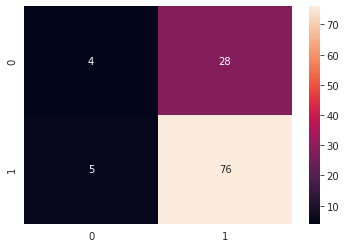

In [50]:
sns.heatmap(a1,annot=True)

Random Forest Classifier

In [51]:
m2=RandomForestClassifier(n_estimators=500, min_samples_split=2, min_samples_leaf=4)
m2.fit(x_train,y_train)

RandomForestClassifier(min_samples_leaf=4, n_estimators=500)

In [52]:
res=m2.predict(x_test)

In [53]:
print(accuracy_score(y_test,res)*float(100))

74.33628318584071


In [54]:
a2=confusion_matrix(y_test,res)
a2

array([[10, 22],
       [ 7, 74]])

<AxesSubplot:>

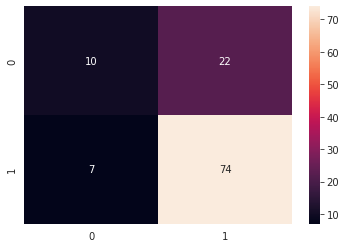

In [55]:
sns.heatmap(a2,annot=True)

In [84]:
m3=RandomForestClassifier(n_estimators=20)
m3.fit(x_train,y_train)
res1=m3.predict(x_test)
print(accuracy_score(y_test,res1)*float(100))

76.99115044247787


In [85]:
a3=(confusion_matrix(y_test,res1))

<AxesSubplot:>

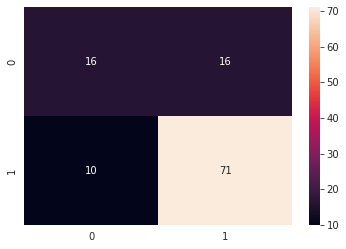

In [86]:
sns.heatmap(a3,annot=True)

SVM

In [59]:
m4=SVC(C=1, gamma=1)
m4.fit(x_train, y_train)

SVC(C=1, gamma=1)

In [60]:
res2=m4.predict(x_test)

In [61]:
print(accuracy_score(y_test,res2)*float(100))

71.68141592920354


In [62]:
print(confusion_matrix(y_test,res2))

[[ 0 32]
 [ 0 81]]


Logistic Regression

In [63]:
m5=LogisticRegression()
m5.fit(x_train,y_train)

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  intercept_scaling : float, default=1


LogisticRegression()

In [64]:
res4=m5.predict(x_test)
a5=accuracy_score(y_test,res4)
a5

0.7256637168141593

In [65]:
print(confusion_matrix(y_test,res4))

[[ 7 25]
 [ 6 75]]


Decision Tree Classifier

In [66]:
m6= DecisionTreeClassifier()
m6.fit(x_train, y_train)

DecisionTreeClassifier()

In [67]:
res5=m6.predict(x_test)

In [68]:
a6=accuracy_score(y_test,res5)*float(100)
a6

71.68141592920354

In [69]:
print(confusion_matrix(y_test,res5))

[[17 15]
 [17 64]]


In [70]:
import joblib

In [71]:
joblib.dump(m3,'disease.pkl')

['disease.pkl']

In [72]:
!pip install ibm_watson_machine_learning

In [73]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"kLomfc2FUoTTlDe3yRiXQ5pSsrEyYyDtdl8bkXLmoasX"
}
client=APIClient(wml_credentials)

In [74]:
def guid_from_space_name(client,space_name):
    space=client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']["name"]==space_name)['metadata']['id'])

In [77]:
space_uid=guid_from_space_name(client,'models')
print("Space UID = "+space_uid)

Space UID = 06f2af0d-4499-4f36-88fb-e651729164c2


In [78]:
client.set.default_space(space_uid)

'SUCCESS'

In [79]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [94]:
MODEL_NAME = "liver_modelling"
DEPLOYMENT_NAME = "models"
DEMO_MODEL = m3

In [95]:
software_spec_uid=client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [96]:
import sklearn
sklearn.__version__

'1.0.2'

In [97]:
model_props = {
    client.repository.ModelMetaNames.NAME: MODEL_NAME,
    client.repository.ModelMetaNames.TYPE : 'scikit-learn_1.0',
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID : software_spec_uid
}

In [98]:
model_details = client.repository.store_model(
    model = DEMO_MODEL,
    meta_props = model_props,
    training_data = x_train,
    training_target = y_train
)

In [99]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'Dataset',
  'schemas': {'input': [{'fields': [{'name': 'Age', 'type': 'int64'},
      {'name': 'Gender', 'type': 'int64'},
      {'name': 'Total_Bilirubin', 'type': 'float64'},
      {'name': 'Direct_Bilirubin', 'type': 'float64'},
      {'name': 'Alkaline_Phosphotase', 'type': 'int64'},
      {'name': 'Alamine_Aminotransferase', 'type': 'int64'},
      {'name': 'Aspartate_Aminotransferase', 'type': 'int64'},
      {'name': 'Total_Protiens', 'type': 'float64'},
      {'name': 'Albumin', 'type': 'float64'},
      {'name': 'Albumin_and_Globulin_Ratio', 'type': 'float64'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-11-21T11:17:55.433Z',
  'id': 'bb1280d9-a83b-421f-8e2f-051c97b21e89',
  'modified_at': '2022-11-21T11:17:58.103Z',
  'name': 'liv

In [100]:
model_id=client.repository.get_model_uid(model_details)
model_id

This method is deprecated, please use get_model_id()


'bb1280d9-a83b-421f-8e2f-051c97b21e89'

model_metadata={
    client.repository.ModelMetaNames.NAME:"liver_modelling",
    client.repository.ModelMetaNames.TYPE:"scikit-learn_0.20",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
}

model_details=client.repository.store_model(model=m3,meta_props=model_metadata)
#model_id=client.repository.get_model_uid(model_details)
#model_id